In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
spanishStemmer = stopwords.words('spanish')
import regex
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim
from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
spanishStemmer0 = set(stopwords.words('spanish'))

#add words that aren't in the NLTK stopwords list
new_stopwords1 = ['t', 'co']
spanishStemmer = spanishStemmer0.union(new_stopwords1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Extraccion datos Twitter

In [3]:
# Leer llaves
keys = pd.read_csv("keys_demo.csv", header=None, sep='\t')
keys = dict(zip(keys[0],keys[1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [4]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [5]:
def creacion_twit(tweets):
    t = []
    print(tweets)
    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)
        temp.append(tweet.created_at)
        #temp.append("Bogota")
        temp.append(tweet.user.location)
        temp.append(tweet.place)
        temp.append(tweet.coordinates)
        temp.append(tweet.id)                      
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
        t.append(temp)
    return t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [6]:
def buscar_twit(hastag):
    tweets = tweepy.Cursor(api.search,
                           q=[str(hastag)+' -RT'],
                           lang='es',
                           tweet_mode='extended',
                           include_rts=False).items(300)
    campo=creacion_twit(tweets)
    print(f"El hastag es {hastag}")
    return campo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### avvillas

In [7]:
data_twit=buscar_twit('avvillas')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



El hastag es avvillas


In [8]:
data_frame=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
data_frame[['id']].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



id    31
dtype: int64

In [10]:
data_frame['tweet'][3]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'@Banco_AvVillas explíqueme cómo es posible que retiro tres millones de una sucursal suya en bosa y me descuentan 120,000 que por el 4 por mil esa es la explicación del asesor es un mango es un centro de robo'

### av villas

In [11]:
data_twit2=buscar_twit('av villas')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



El hastag es av villas


In [12]:
data_frame2=pd.DataFrame(data_twit2, columns=['tweet','date','location','place','coordinates','id','link'])
data_frame2[['id']].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



id    73
dtype: int64

In [13]:
df_union = data_frame.append(data_frame2, ignore_index=True)
df_union['id'].count()
df_union

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0    @grupoaval @BancodeBogota @Bco_Occidente @Bco_... 2021-05-12 12:16:52   
1    @paulivelandia @williamnamen @Bogota @ClaudiaL... 2021-05-12 02:14:27   
2    Que banco de mierda es @AMAMOSAVVILLAS @Banco_... 2021-05-11 19:06:00   
3    @Banco_AvVillas explíqueme cómo es posible que... 2021-05-11 17:11:43   
4    @alejomontess @PattyRosi24 @Alexand39727033 @c... 2021-05-11 14:55:07   
..                                                 ...                 ...   
99   @BLUSantanderes @BluRadioCo Av Villas, del gru... 2021-05-05 02:35:23   
100  @CaracolRadio Av Villas con 138, plantón muy p... 2021-05-05 02:33:50   
101  El Grupo Aval (dueño de AV Villas) tiene más d... 2021-05-05 02:31:16   
102  Así quedaron las oficinas del banco Av Villas ... 2021-05-05 02:17:25   
103  Así dejaron el Banco Av Villas de la cra 29 co... 2021-05-05 01:26:12   

                   location  \
0                  Colombia   
1          Bogotá, Colombia   
2                             
3                             
4                             
..                      ...   
99   Bogotá, D.C., Colombia   
100     La Calera, Colombia   
101                           
102             Bucaramanga   
103   Bucaramanga, Colombia   

                                                 place coordinates  \
0                                                 None        None   
1                                                 None        None   
2                                                 None        None   
3                                                 None        None   
4                                                 None        None   
..                                                 ...         ...   
99                                                None        None   
100                                               None        None   
101                                               None        None   
102                                               None        None   
103  Place(_api=<tweepy.api.API object at 0x0000021...        None   

                      id                                               link  
0    1392453722266079235  https://twitter.com/i/web/status/1392453722266...  
1    1392302120402145281  https://twitter.com/i/web/status/1392302120402...  
2    1392194297915715587  https://twitter.com/i/web/status/1392194297915...  
3    1392165533710159878  https://twitter.com/i/web/status/1392165533710...  
4    1392131159413436418  https://twitter.com/i/web/status/1392131159413...  
..                   ...                                                ...  
99   1389770672176615424  https://twitter.com/i/web/status/1389770672176...  
100  1389770283226107904  https://twitter.com/i/web/status/1389770283226...  
101  1389769637668212739  https://twitter.com/i/web/status/1389769637668...  
102  1389766148846231554  https://twitter.com/i/web/status/1389766148846...  
103  1389753261507457026  https://twitter.com/i/web/status/1389753261507...  

[104 rows x 7 columns]

# Clasificacion de textos

In [14]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in spanishStemmer])
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [15]:
df_union["procesado"]= df_union['tweet'].apply(lambda texto: pre_procesado(texto))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [16]:
cadena=""
for a in df_union["procesado"]:
    cadena=cadena+a
cadena=cadena.split()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [17]:
cadena_campos=pd.DataFrame(cadena,columns=['Palabra'])
cadena_campos['validador']=1
agrupacion_palabras = cadena_campos.groupby(['Palabra'], as_index = False)[['validador']].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
agrupacion_palabras=agrupacion_palabras.sort_values(by='validador', ascending=False)
agrupacion_palabras

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Palabra  validador
90                 av         74
1012           villas         73
109             banco         45
95           avvillas         30
486             https         25
...               ...        ...
412        finalizada          1
413          financia          1
415        financiero          1
416   financierobanco          1
1049          órdenes          1

[1050 rows x 2 columns]

# Analisis de sentimientos

In [19]:
from deep_translator import GoogleTranslator
def traduccion(to_translate):
    translated = GoogleTranslator(source='es', target='english').translate(to_translate)
    return translated

def generar_grafico2(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = df_union.tweet.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
df_union['tweetingles']=df_union['tweet'].apply(lambda text: traduccion(text))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
df_union[['tweetingles','tweet']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweetingles  \
0    @grupoaval @BancodeBogota @Bco_Occidente @Bco_...   
1    @paulivelandia @williamnamen @Bogota @ClaudiaL...   
2    What a shitty bank is @AMAMOSAVVILLAS @Banco_A...   
3    @Banco_AvVillas explain to me how it is possib...   
4    @alejomontess @ PattyRosi24 @ Alexand39727033 ...   
..                                                 ...   
99   @BLUSantanderes @BluRadioCo Av Villas, from th...   
100  @CaracolRadio Av Villas with 138, very peacefu...   
101  Grupo Aval (owner of AV Villas) has more than ...   
102  This is how the offices of the Av Villas bank ...   
103  This is how they left the Banco Av Villas de l...   

                                                 tweet  
0    @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  
1    @paulivelandia @williamnamen @Bogota @ClaudiaL...  
2    Que banco de mierda es @AMAMOSAVVILLAS @Banco_...  
3    @Banco_AvVillas explíqueme cómo es posible que...  
4    @alejomontess @PattyRosi24 @Alexand39727033 @c...  
..                                                 ...  
99   @BLUSantanderes @BluRadioCo Av Villas, del gru...  
100  @CaracolRadio Av Villas con 138, plantón muy p...  
101  El Grupo Aval (dueño de AV Villas) tiene más d...  
102  Así quedaron las oficinas del banco Av Villas ...  
103  Así dejaron el Banco Av Villas de la cra 29 co...  

[104 rows x 2 columns]

In [22]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(df_union['tweetingles'])

df_union['neg'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
df_union['neu'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
df_union['pos'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
df_union['compound'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

df_union.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_... 2021-05-12 12:16:52   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL... 2021-05-12 02:14:27   
2  Que banco de mierda es @AMAMOSAVVILLAS @Banco_... 2021-05-11 19:06:00   
3  @Banco_AvVillas explíqueme cómo es posible que... 2021-05-11 17:11:43   
4  @alejomontess @PattyRosi24 @Alexand39727033 @c... 2021-05-11 14:55:07   

           location place coordinates                   id  \
0          Colombia  None        None  1392453722266079235   
1  Bogotá, Colombia  None        None  1392302120402145281   
2                    None        None  1392194297915715587   
3                    None        None  1392165533710159878   
4                    None        None  1392131159413436418   

                                                link  \
0  https://twitter.com/i/web/status/1392453722266...   
1  https://twitter.com/i/web/status/1392302120402...   
2  https://twitter.com/i/web/status/1392194297915...   
3  https://twitter.com/i/web/status/1392165533710...   
4  https://twitter.com/i/web/status/1392131159413...   

                                           procesado  \
0  grupoaval bancodebogota bco occidente bco popu...   
1  paulivelandia williamnamen bogota claudialopez...   
2  banco mierda amamosavvillas banco avvillas rea...   
3  banco avvillas explíqueme cómo posible retiro ...   
4  alejomontess pattyrosi alexand claudiazunigam ...   

                                         tweetingles    neg    neu    pos  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309  0.691  0.000   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL...  0.000  1.000  0.000   
2  What a shitty bank is @AMAMOSAVVILLAS @Banco_A...  0.390  0.610  0.000   
3  @Banco_AvVillas explain to me how it is possib...  0.000  1.000  0.000   
4  @alejomontess @ PattyRosi24 @ Alexand39727033 ...  0.120  0.781  0.099   

   compound  
0   -0.6166  
1    0.0000  
2   -0.9403  
3    0.0000  
4   -0.3749

In [23]:
data_pos=df_union[[ 'tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
90   Ayúdanos a ayudar!!!!\nNequi : 325079122\nDavi...  0.319
89   Ayúdanos a ayudar!!!!\nNequi : 325079122\nDavi...  0.305
100  @CaracolRadio Av Villas con 138, plantón muy p...  0.298
47   Mañana a los de Av villas les espera una putia...  0.291
24   @quischur ese Twit hubiese sido perfecto con e...  0.270
7    @Banco_AvVillas Dios os bendiga y muy buenas t...  0.261
64   Reporta 911.\nIntentó de ejecución. \nSm259, a...  0.259
19   @quischur Menos mal no se metieron con @grupoa...  0.253
51   @CaptainPolombia @HelmerTorres6 @Gu2Hail @Gust...  0.252
14   #Anonymous para pagar el #icetex y de crédito ...  0.217

In [66]:
data_pos['tweet'][100]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'@CaracolRadio Av Villas con 138, plantón muy pacifico y ordenado. (Dato curioso, ni un solo policía) https://t.co/UEfaGA5nXr'

In [25]:
data_pos=df_union[[ 'tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
2   Que banco de mierda es @AMAMOSAVVILLAS @Banco_...  0.390
0   @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309
13  He tenido malas experiencias con diferentes ba...  0.253
65  El país vuelto mierda y los de av villas llama...  0.249
81  @carolinaguerram Llama la Atencion en Bogotá e...  0.230
18  @Banco_AvVillas \n\nSus procesos son en exceso...  0.222
67  Mi insulto adulto del día es: usted es más len...  0.216
46  Si hacen una competencia del peor banco, el pr...  0.194
86  MOTOCICLISTA LESIONADO 🚑 en Guadalajara, Col. ...  0.186
21  @Banco_AvVillas \n\nSeñores, qué falta de cont...  0.167

In [28]:
data_pos['tweet'][2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'Que banco de mierda es @AMAMOSAVVILLAS @Banco_AvVillas , realmente todos los bancos de este país son una mierda, son peores que el Covid, el sida, el ébola, el cáncer y el ántrax juntos.'

In [35]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.4):
        descipcion="Positivo"
    elif(numero>=-0.6):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
df_union['sentimiento'] = df_union.apply(desc_sentimiento, axis=1, result_type='expand')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
df_union.groupby(['sentimiento'], as_index = False)[['tweet']].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



sentimiento  tweet
0    Negativo     12
1      Neutro     65
2    Positivo     27

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

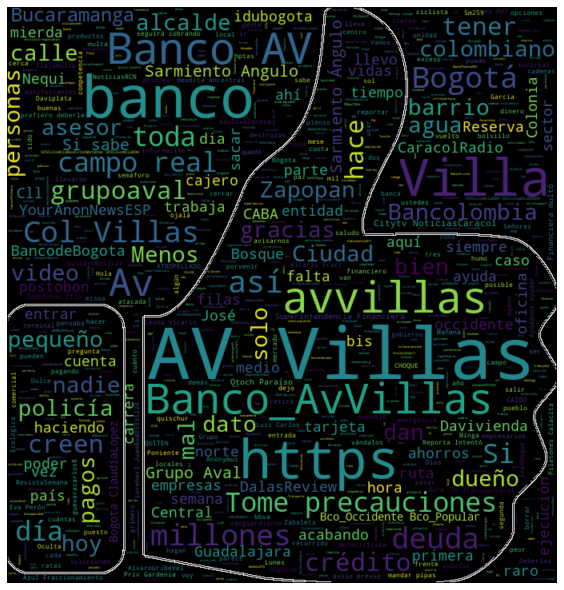

In [39]:
data_positivo=df_union[df_union['sentimiento']=="Positivo"]
generar_grafico2(data_positivo,"positivo2.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

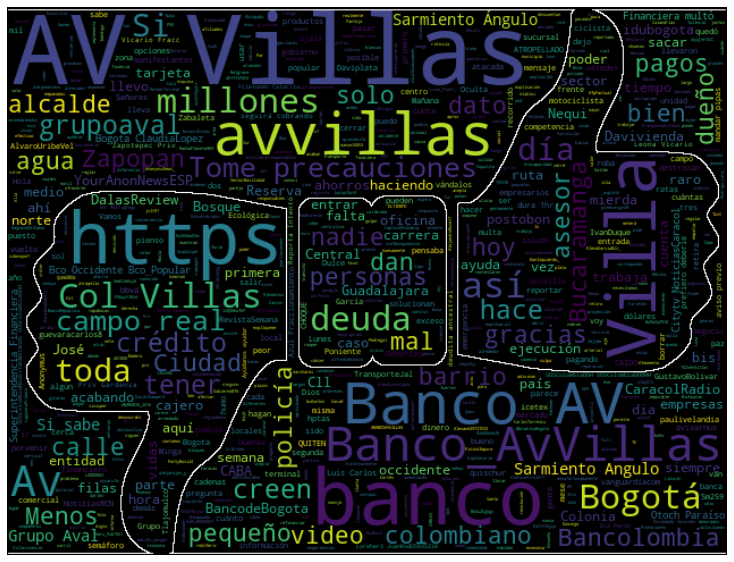

In [40]:
data_neutro=df_union[df_union['sentimiento']=="Neutro"]
generar_grafico2(data_neutro,"neutro.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

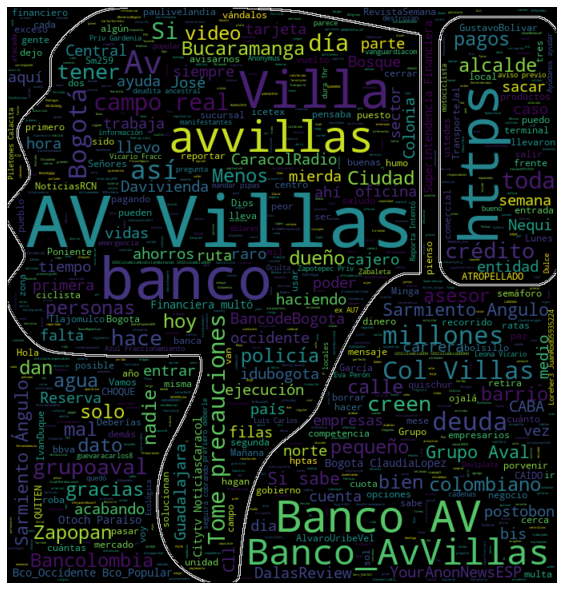

In [41]:
data_negativo=df_union[df_union['sentimiento']=="Negativo"]
generar_grafico2(data_negativo,"negativo.png")

# Analisis grafico

In [42]:
def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = df_union.procesado.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

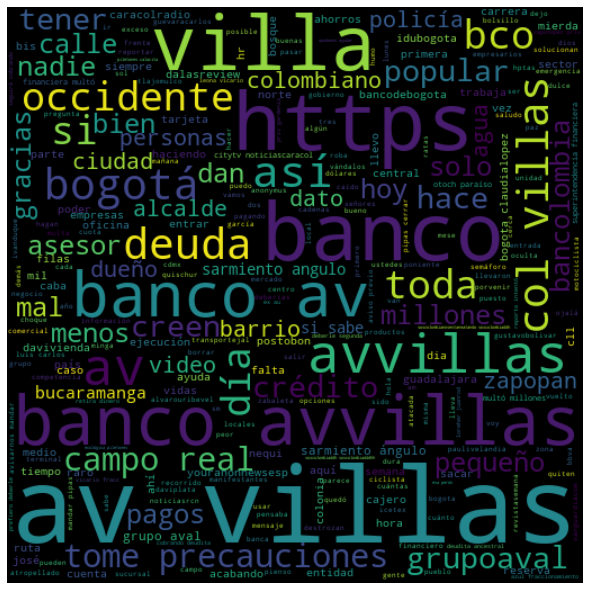

In [43]:
generar_grafico(df_union['procesado'],"wine.png")

In [44]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
 
df_union['emojis'] = df_union['tweet'].apply(lambda text: get_emojis(text))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
df_union.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_... 2021-05-12 12:16:52   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL... 2021-05-12 02:14:27   
2  Que banco de mierda es @AMAMOSAVVILLAS @Banco_... 2021-05-11 19:06:00   

           location place coordinates                   id  \
0          Colombia  None        None  1392453722266079235   
1  Bogotá, Colombia  None        None  1392302120402145281   
2                    None        None  1392194297915715587   

                                                link  \
0  https://twitter.com/i/web/status/1392453722266...   
1  https://twitter.com/i/web/status/1392302120402...   
2  https://twitter.com/i/web/status/1392194297915...   

                                           procesado  \
0  grupoaval bancodebogota bco occidente bco popu...   
1  paulivelandia williamnamen bogota claudialopez...   
2  banco mierda amamosavvillas banco avvillas rea...   

                                         tweetingles    neg    neu  pos  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309  0.691  0.0   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL...  0.000  1.000  0.0   
2  What a shitty bank is @AMAMOSAVVILLAS @Banco_A...  0.390  0.610  0.0   

   compound sentimiento emojis  
0   -0.6166    Negativo     []  
1    0.0000      Neutro     []  
2   -0.9403    Negativo     []

In [46]:
temp_emojis = pd.DataFrame(list(zip(Counter(sum(df_union.emojis.values,[])).keys(),Counter(sum(df_union.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



emoji  cnt
9      🚑    2
11     🌮    2
2      🚙    2
3      💥    2
4      🚗    2
14     ⚠    2
17     🙄    1
16     🤣    1
15     😠    1
13     🛵    1

In [47]:
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



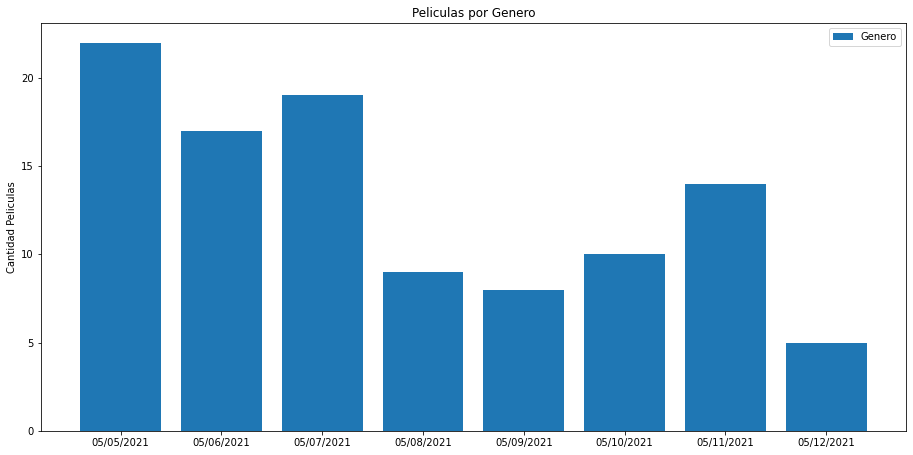

In [48]:
df_union['validador']=1
df_union['dia_publicacion']=df_union['date'].dt.strftime('%m/%d/%Y')

agrupacion_pais = df_union.groupby(['dia_publicacion'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["dia_publicacion"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Peliculas')
ax.set_title('Peliculas por Genero')
ax.legend()
plt.show()

# Analisis de Closters

In [49]:
df_union["procesado2"]= df_union['procesado'].apply(lambda texto: texto.split())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
dictionary_1 = Dictionary(df_union["procesado2"].values)
dictionary_1.filter_extremes(no_below=20, no_above=0.4)
corpus1 = [dictionary_1.doc2bow(text) for text in df_union["procesado2"].values]
model1 = LdaModel(corpus=corpus1, id2word=dictionary_1, num_topics=5, passes=60)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\asyncio\events.py:81: DeprecationWarning:

`run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
lda_display1 = pyLDAvis.gensim.prepare(model1, corpus1, dictionary_1, sort_topics=True)
pyLDAvis.display(lda_display1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(df_union["procesado"].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



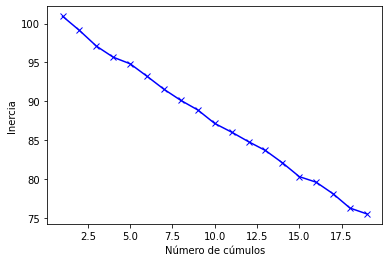

In [53]:
ks = []
k_inertia = []
for k in range(1,20):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.plot(ks, k_inertia, 'bx-')

In [54]:
k = 4
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=4)

In [55]:
df_union[['cluster']] = pd.DataFrame(model.labels_)
df_union.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_... 2021-05-12 12:16:52   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL... 2021-05-12 02:14:27   

           location place coordinates                   id  \
0          Colombia  None        None  1392453722266079235   
1  Bogotá, Colombia  None        None  1392302120402145281   

                                                link  \
0  https://twitter.com/i/web/status/1392453722266...   
1  https://twitter.com/i/web/status/1392302120402...   

                                           procesado  \
0  grupoaval bancodebogota bco occidente bco popu...   
1  paulivelandia williamnamen bogota claudialopez...   

                                         tweetingles    neg    neu  pos  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309  0.691  0.0   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL...  0.000  1.000  0.0   

   compound sentimiento emojis  validador dia_publicacion  \
0   -0.6166    Negativo     []          1      05/12/2021   
1    0.0000      Neutro     []          1      05/12/2021   

                                          procesado2  cluster  
0  [grupoaval, bancodebogota, bco, occidente, bco...        1  
1  [paulivelandia, williamnamen, bogota, claudial...        1